# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM CBB3**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

We have  imported some **libraries** which will help us load and explore our data.this Python Libraries will help visualise the data and further manipulate it 


In [1]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import * 
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
#import xgboost as xgb
#from xgboost import plot_importance
pd.set_option('max_columns', None)
#from catboost import *
#import catboost
from sklearn.model_selection import GridSearchCV
import shap

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

## We will load our data as a Pandas DataFrame for the Gihub 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Explore-Regression-Team-CBB3/Regression-public-data/main/df_train.csv", index_col=0)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


# Data statistics
### We are going to look at the data before we do further explorotary analysis


In [4]:
#To view the first 10 data in the dataframe
df.head(10)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.000000,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.000000,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.000000,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.000000,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.000000,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
5,2015-01-01 18:00:00,1.000000,level_7,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,0.0,191.333333,4.666667,254.666667,0.0,2.666667,0.0,sp25,0.0,0.0,1035.666667,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,NaN,282.077844,1013.333333,277.622563,277.622563,800.666667,282.077844,72.666667,277.622563,284.165625,274.639229,284.165625,277.919000,277.919000,284.165625,277.919000,282.077844,274.639229,274.639229,6842.000000
6,2015-01-01 21:00:00,1.000000,level_8,0.0,1.000000,83.666667,63.333333,16.333333,1.000000,0.0,210.333333,3.333333,276.000000,0.0,2.000000,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1006.000000,277.637000,974.333333,272.270333,272.270333,800.666667,277.637000,83.333333,272.270333,283.420333,268.287000,283.420333,274.295437,274.295437,283.420333,274.295437,277.637000,268.287000,268.287000,10760.333333
7,2015-01-02 00:00:00,1.000000,level_9,0.0,1.000000,83.666667,64.000000,8.666667,1.333333,0.0,238.666667,2.000000,310.000000,0.0,2.333333,0.0,sp25,0.0,0.0,1037.6666

This command  ` df.info` shows the datatype which will help check which data falls into the numerical and categorical data where numerical is integer,float and catagorical is object.This helps to distinguish which data visualisation applies to which data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

   *  We can see from above cell that Seville_pressure,Valencia_wind_deg,time  are object   while the rest are numerical 

In [6]:
df.shape

(8763, 48)


This command  below will provide the total number of null values appearing in each feature .

In [7]:
df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

We can see that *Valencia_pressure   =  2068* has large amount of null values which we will further look at in the Data Engineering stage

In [8]:
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.000000,297.248333,296.056667,801.666667,299.620333,81.333333,294.820000,296.855000,296.816667,

**Skew** command will show  how symmetrical the data is.

In [10]:
df.skew()

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

# insight of skewness
* if the value of the skewness is -0.5 < x < 0.5 then it is Fairly Symmetrical but if <-0.5 then it is negatively skewed  and if >0.5 then it positively skewed 
* some of the features are heavily skewed which may need to   be converted to normal distribution to increase the accuracy of the model by using  a logarithmic function  

### We need to check for **outliers** in the dataset  in this case we going to use the *Kurtosis*  which is the measure of outliers present in the data. High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers.we cam clearly see in some data we have a large number of outliers

In [11]:
df.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

# Plot relevant feature interactions

In [12]:
features = ['Bilbao_rain_1h', 'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Bilbao_wind_deg'
            ,'Bilbao_snow_3h','Bilbao_pressure','Bilbao_weather_id','Bilbao_temp','Bilbao_temp_max'
            ,'Madrid_wind_speed','Valencia_wind_speed','Valencia_wind_speed','Seville_humidity',
            'Madrid_humidity','Seville_clouds_all','Barcelona_wind_speed','Barcelona_wind_deg','Madrid_clouds_all'
            ,'Seville_wind_speed','Barcelona_rain_1h','Seville_rain_1h','Barcelona_pressure','Seville_rain_3h'
            ,'Madrid_rain_1h','Barcelona_rain_3h','Valencia_snow_3h','Madrid_weather_id','Barcelona_weather_id'
            ,'Seville_weather_id','Valencia_pressure','Seville_temp_max','Madrid_pressure','Valencia_temp_max'
            ,'Valencia_temp','Seville_temp','Valencia_humidity','Valencia_temp_min','Barcelona_temp_max','Madrid_temp_max'
            ,'Barcelona_temp','Seville_temp_min','Madrid_temp' , 'Madrid_temp_min'] 
# create a list of all numerical features

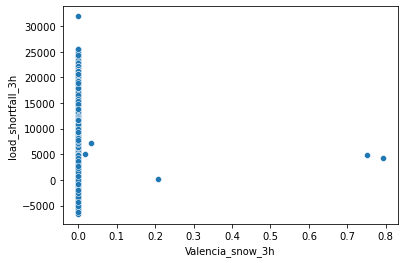

In [13]:
sns.scatterplot(x='Valencia_snow_3h',y='load_shortfall_3h', data=df);

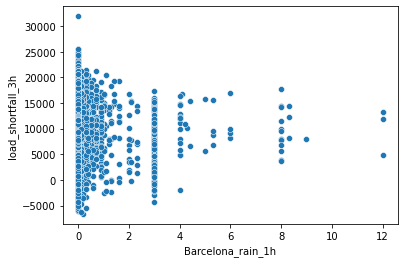

In [14]:
sns.scatterplot(x='Barcelona_rain_1h',y='load_shortfall_3h', data=df);

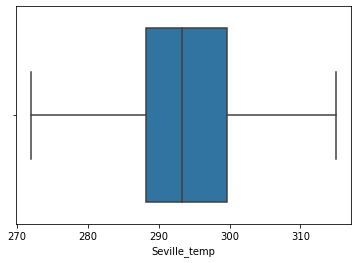

In [15]:
sns.boxplot(x='Seville_temp', data=df);

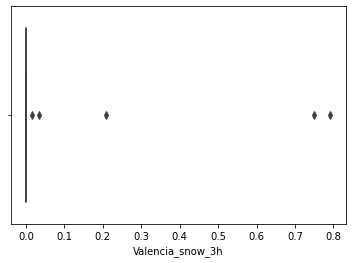

In [21]:
sns.boxplot(x='Valencia_snow_3h', data=df);   

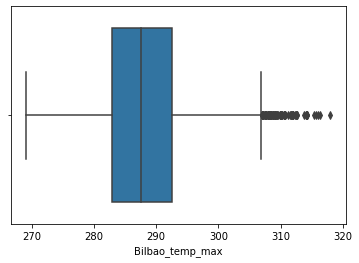

In [20]:
sns.boxplot(x='Bilbao_temp_max', data=df);

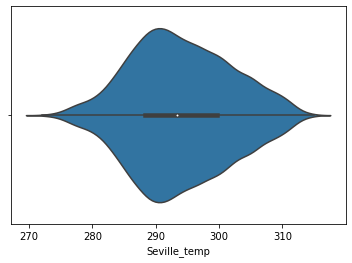

In [19]:
sns.violinplot(x='Seville_temp', data=df);

# we have notice that some of the features have large amount of outliers eg `Bilbao_temp_max` boxplot 

## visualisation for some categorical data using the bar graph 

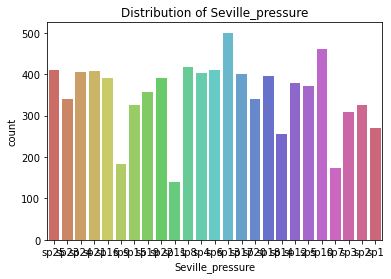

In [65]:
sns.countplot(x = 'Seville_pressure', data = df, palette="hls")
plt.title("Distribution of Seville_pressure");

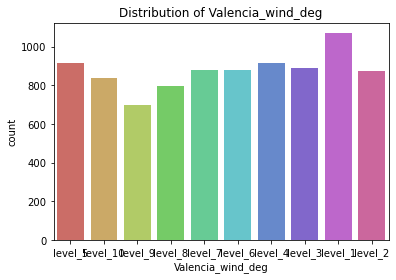

In [68]:
sns.countplot(x = 'Valencia_wind_deg', data = df, palette="hls")
plt.title("Distribution of Valencia_wind_deg");

# Insight of some features
* we noticed some features have large amount of outliers 
* some features dont have outliers 

## evaluating  correlation of the data

In [16]:
df1 = df.copy()

In [17]:
df1.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157088,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,-0.018225,0.239326,0.213420,-0.026640,0.073080,-0.001642,0.009572,-0.026037,0.088502,-0.038246,-0.008114,-0.101497,-0.003074,-0.122915,-0.086691,0.054035,0.103342,0.075541,0.091352,0.093919,-0.031661,0.080357,-0.279825,0.093177,0.011151,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,-0.0

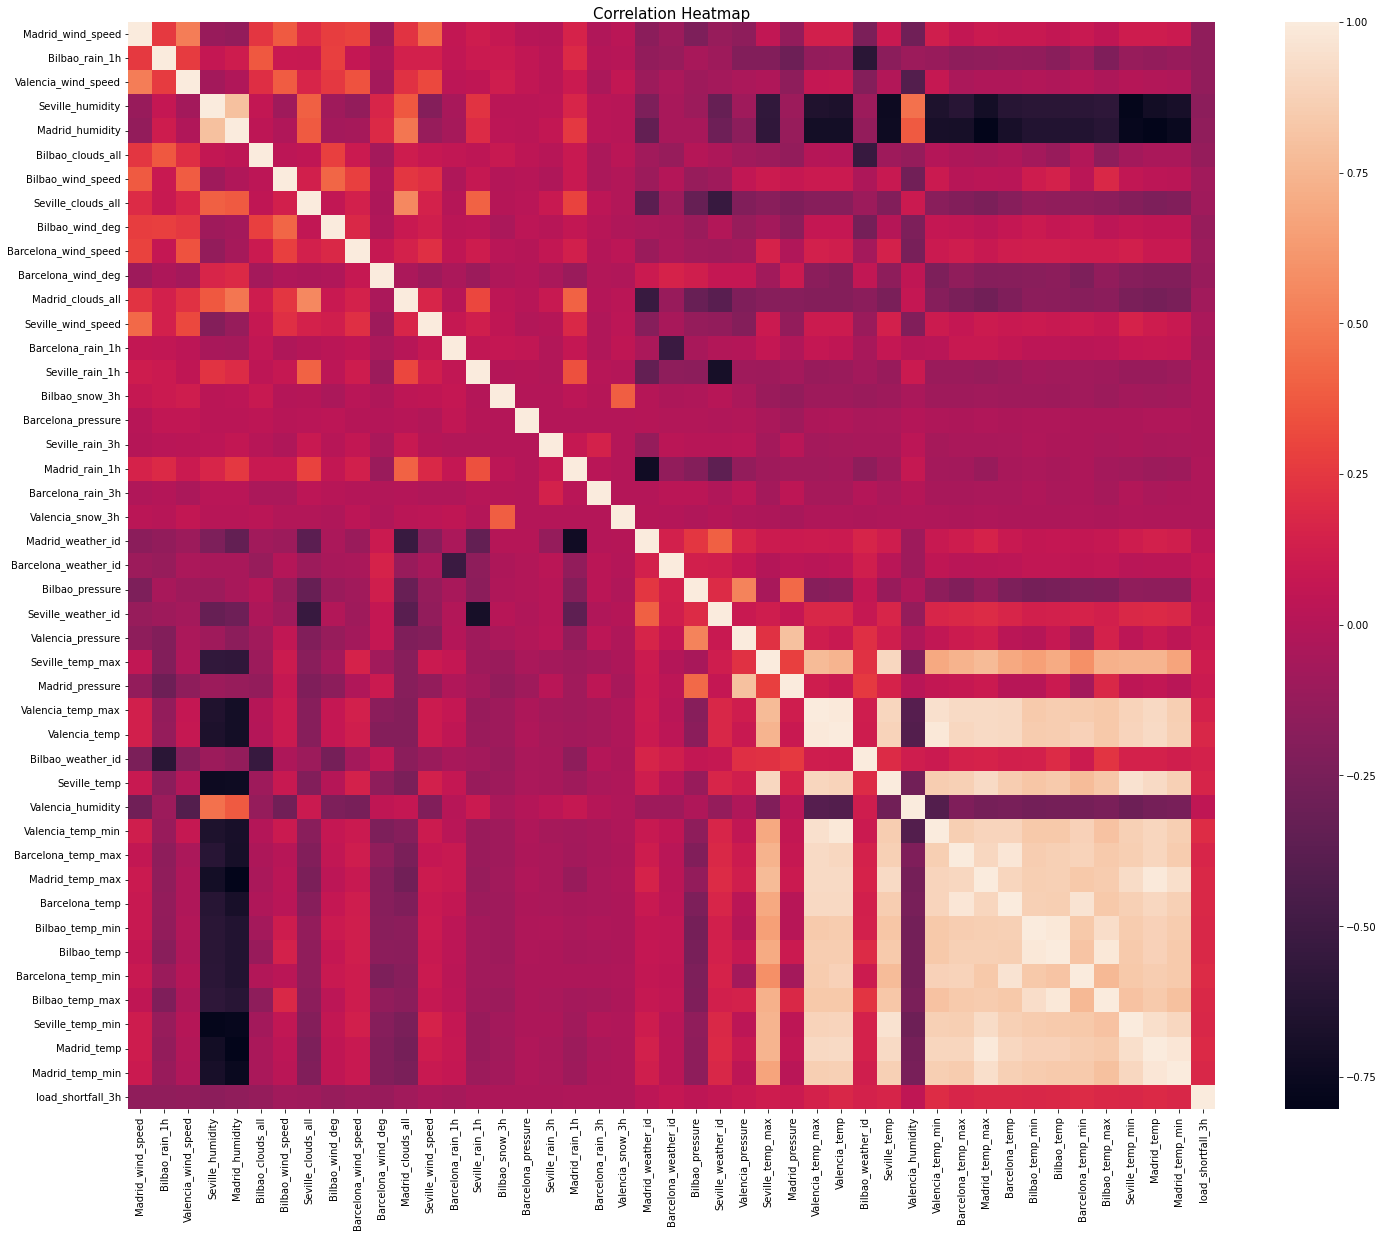

In [30]:
fig, ax = plt.subplots(figsize = (25,20))
heatmap = sns.heatmap(df1.corr(),square = True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=1);

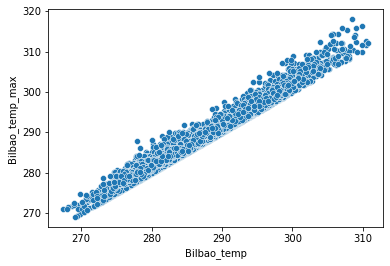

In [31]:
sns.scatterplot(x='Bilbao_temp',y='Bilbao_temp_max', data=df1);

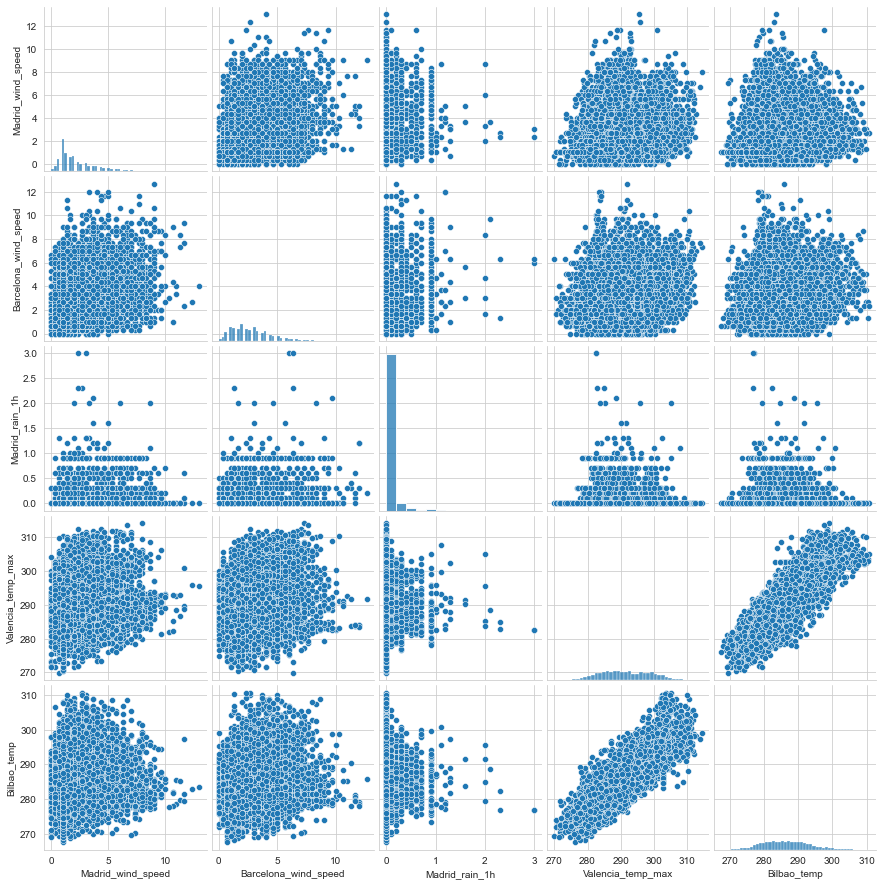

In [69]:
sns.set_style("whitegrid");
sns.pairplot(df1.iloc[:, 1::10]);
plt.show()

# insight of correlation 
 correlation heat map of the features above which 
* shows the relationship between the features 
* some of the features have poor correlation which may be redundant to use on the model

# looking at feature distributions

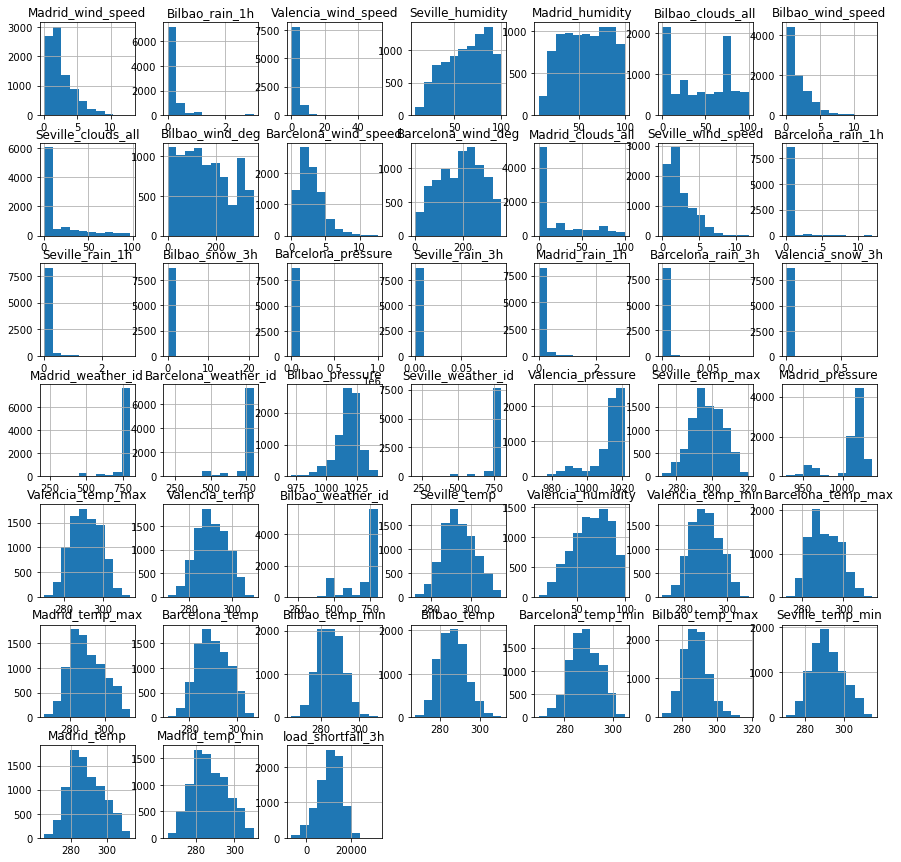

In [32]:
df.hist(figsize=(15,15));

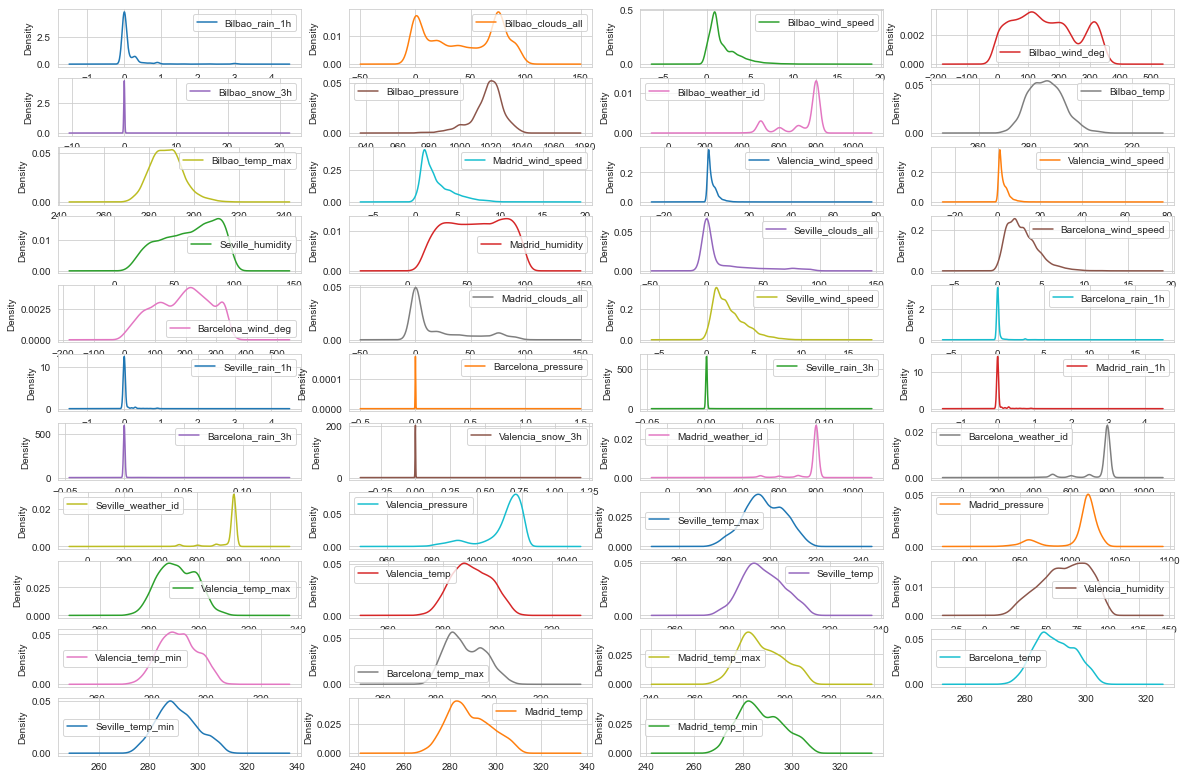

In [44]:
df[features].plot(kind='density', subplots=True, layout=(12,4), sharex=False, figsize=(20, 15));

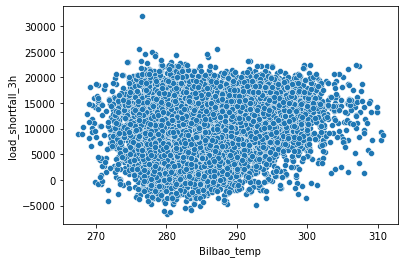

In [33]:
sns.scatterplot(x='Bilbao_temp',y='load_shortfall_3h', data=df);

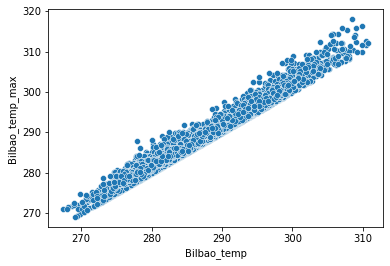

In [34]:
sns.scatterplot(x='Bilbao_temp',y='Bilbao_temp_max', data=df);

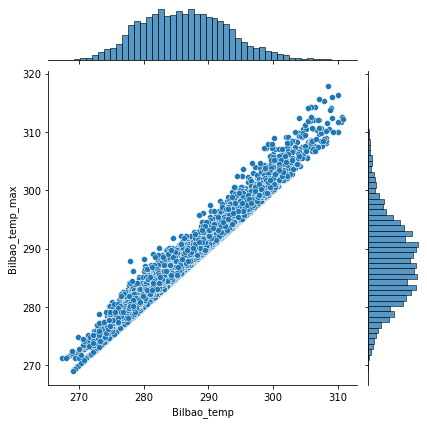

In [35]:
sns.jointplot(x = 'Bilbao_temp', y = 'Bilbao_temp_max', data = df);

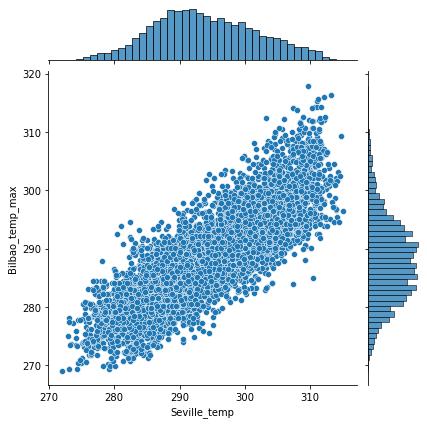

In [36]:
sns.jointplot(x = 'Seville_temp', y = 'Bilbao_temp_max', data = df)

**please be ware the below cells take several minutes to completely run**

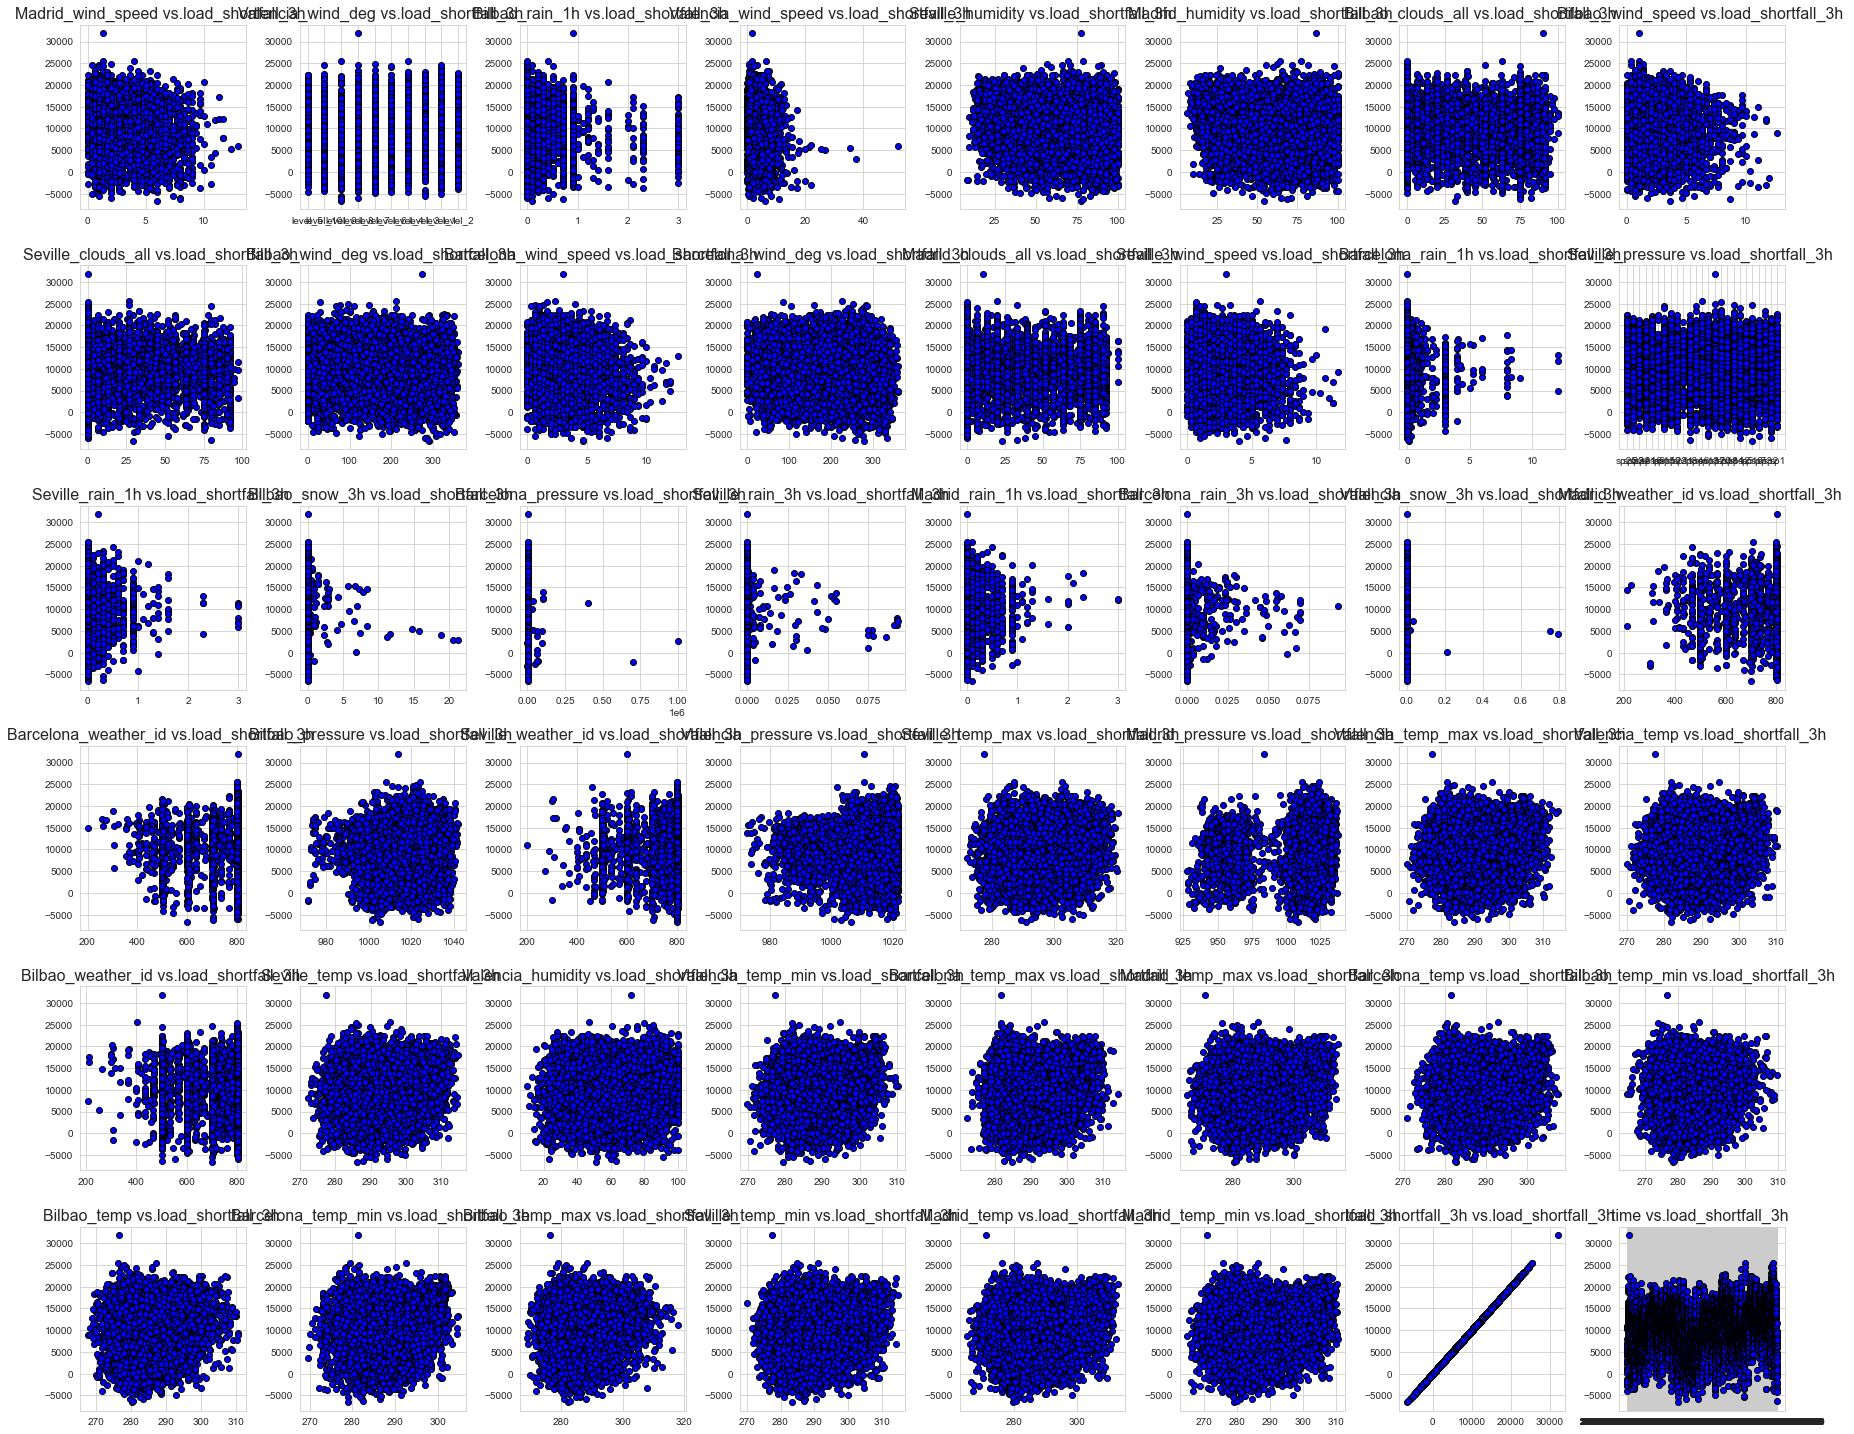

In [60]:
fig, axs = plt.subplots(6,8, figsize=(25,20),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs.load_shortfall_3h ".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['load_shortfall_3h'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

In [68]:
# we wanted to show the multicollinearity of the data but takes too long to run
#from seaborn import pairplot
#g = pairplot(df1.drop(df.iloc[:, 8::48], axis='columns'))
#g.fig.set_size_inches(9,9)

# insight on the feature distribution
* some of the features are fairly distrubuted and some features show linearity with  the Target  

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic